In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Fixed typos in metric names
import statsmodels.api as sm  # Fixed import syntax for statsmodels

In [9]:
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
np.random.seed(42)  # Ensuring reproducibility of random noise
 
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm

In [16]:
# Adding some random noise to salaries to reduce accuracy
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise  # Final dependent variable with noise

In [18]:
# Step 3: Create linear regression model
model=LinearRegression()

In [20]:
#step 4
model.fit(X,Y)

LinearRegression()

In [22]:
#Step 5: get the values of slope(m) and intercept(c) from the training model
m=model.coef_[0]
c=model.intercept_
print(f"Intercept: {c}")
print(f"Coefficients: {m}")

Intercept: 27.430065779800533
Coefficients: 4.965498141580592


In [24]:
#Step 6:Display the equation of the line
print(f"equation of line: Y={m:.2f}X + {c:.2f}")

equation of line: Y=4.97X + 27.43


In [30]:
#Step 7: predict values using model
Y_pred = model.predict(X) #Predict salarie for the given experience values

In [41]:
#1. Mean Square Error(MSE)-average square differene between actuall and perdicted values
mse=mean_squared_error(Y, Y_pred)
print(f"mean square error (MSE):{mse:.2f}")

mean square error (MSE):11.75


In [45]:
#2. Mean Absolute Error(MAE)-average absolute differene between actuall and perdicted values
mae=mean_absolute_error(Y, Y_pred)
print(f"mean absolute error (MAE):{mae:.2f}")

mean absolute error (MAE):2.87


In [47]:
#3. Root Mean Square Error(RMSE)-standard deviation of residuals(errors)
rmse=np.sqrt(mse)
print(f"Root mean square error (RMSE):{rmse:.2f}")

Root mean square error (RMSE):3.43


In [53]:
#4. R-squared(R2)-represents how well the model fits the data(0 to 1, where 1 is best)
r2=r2_score(Y,Y_pred)
print(f"R-squared(R2):{r2:.2f}")

R-squared(R2):0.95


In [59]:
#5. Adjusted R-squared (R^2_adj)-Aqjusted for the number of predictors, better for multiple regression
n=len(Y)
p=1 #Number of independent variables
adj_r2=1-((1-r2)*(n-1)/(n-p-1))
print(f"Adjusted R-squared: {adj_r2:.2f}")

Adjusted R-squared: 0.94


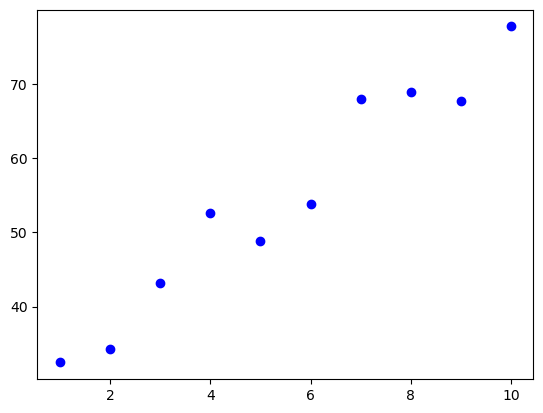

In [65]:
#Step 8: plot the actual data points
plt.scatter(X, Y, color="blue", label='Actual Data')#scatter plot of actual values
plt.show()

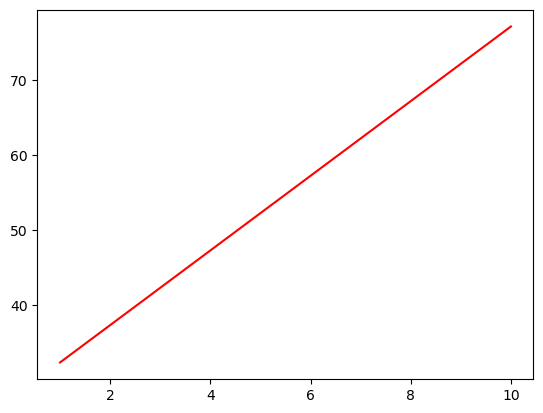

In [67]:
#Step 9:plot the regression line(Best fit line)
plt.plot(X,Y_pred, color='red', label='best fit line')#Regression line
plt.show()

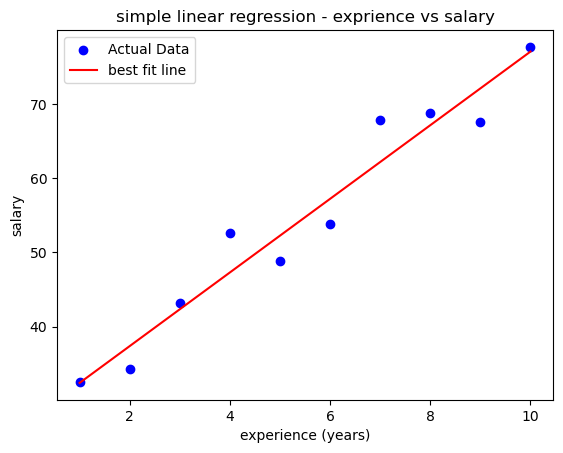

In [71]:
#Step 8: plot the actual data points
plt.scatter(X, Y, color="blue", label='Actual Data')#scatter plot of actual values
plt.plot(X,Y_pred, color='red', label='best fit line')#Regression line
plt.xlabel("experience (years)")
plt.ylabel("salary")
plt.title("simple linear regression - exprience vs salary")
plt.legend()
plt.show()

In [79]:
# User can input experience, and the model will predict salary  
while True:  
    try:  
        exp = float(input("\nEnter years of experience to predict salary (or -1 to exit): "))  
        if exp == -1:  
            break  # Exit the Loop  
        predicted_salary = model.predict(np.array([[exp]]))[0]  
        print(f"Predicted Salary for {exp} years of experience: ${predicted_salary:.2f}K")  
    except ValueError:  
        print("Please enter a valid number!")  


Enter years of experience to predict salary (or -1 to exit):  -1


In [83]:
from sklearn.preprocessing import PolynomialFeatures  # For polynomial transformation
import statsmodels.api as sm  # For OLS Regression

# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(X)  # Transforming X to polynomial features

In [85]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        12:15:06   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

C:\Users\vully\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)
